In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Importing Dataset

In [23]:
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target
feature_names = iris.feature_names
class_names = iris.target_names

In [24]:
# Convert to a Pandas DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

In [25]:
df['species_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [26]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [27]:
import seaborn as sns

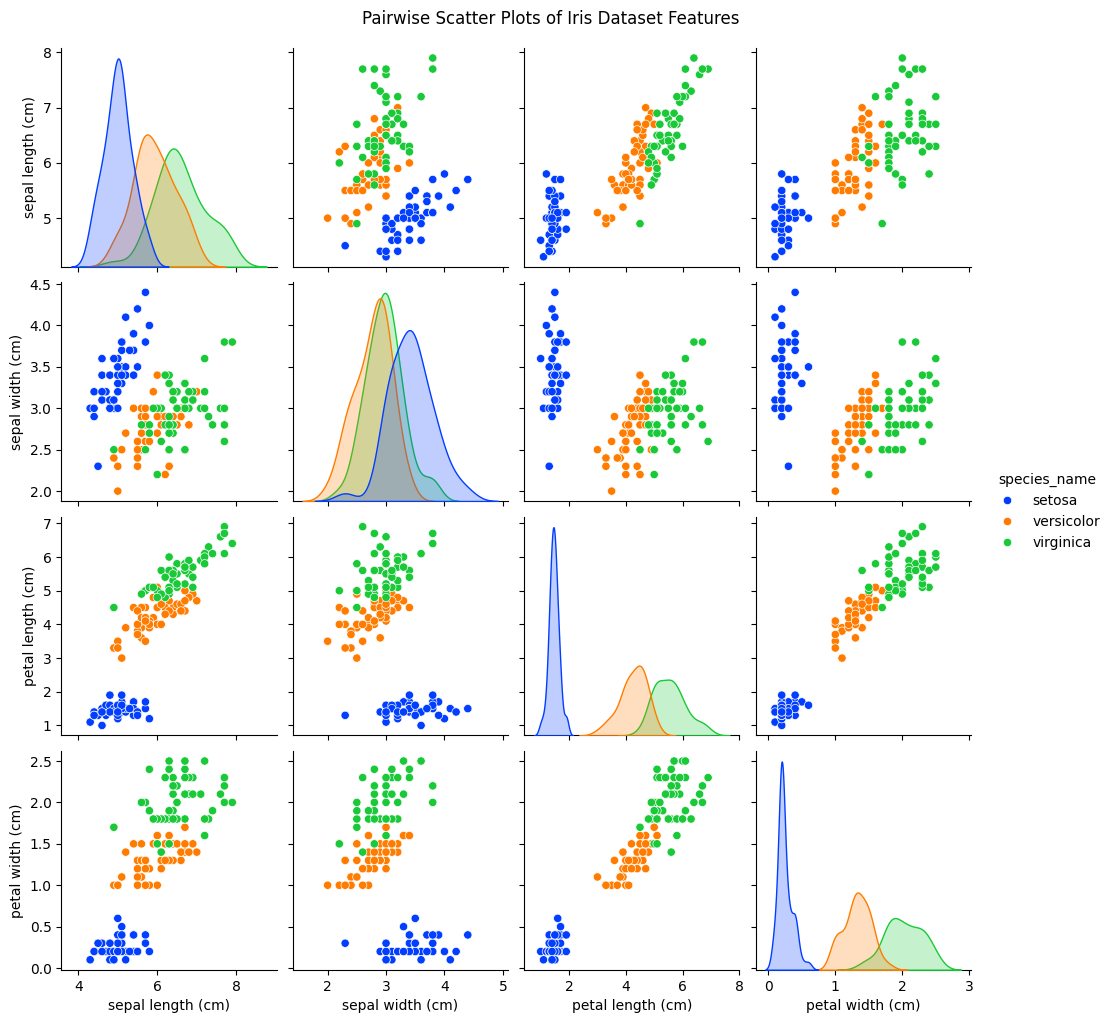

In [28]:
sns.pairplot(df.drop(columns=['species']), hue='species_name', diag_kind='kde', palette='bright')
# Show plot
plt.suptitle("Pairwise Scatter Plots of Iris Dataset Features", y=1.02)
plt.show()

# K-means Clustering
**Algorithm**
1. Initialization: Start by choosing 𝑘
2. k initial centroids (usually randomly from the data points).
3. Assignment Step: Assign each data point to the nearest centroid based on a distance metric (typically Euclidean distance).
4. Update Step: After assigning all points, compute the new centroids as the mean of the points assigned to each centroid.
5. Repeat: Steps 2 and 3 are repeated until the centroids stabilize (i.e., they no longer change, or change only slightly between iterations).

In [79]:
import numpy as np

class KMeans:
    def __init__(self, k=3, itr=10):
        self.k = k  # Number of clusters
        self.itr = itr  # Number of iterations
        self.centroids = None  # To be initialized in make_cluster
        self.clusters = None  # To be assigned after clustering

    def __distance(self, p1, p2):
        # Euclidean distance between two points
        return np.sqrt(np.sum((p1 - p2)**2))

    def __assign_to_clusters(self, X, centroids):
        clusters = [[] for _ in range(self.k)]  # Create empty clusters
        for idx, data_point in enumerate(X):
            distances = [self.__distance(data_point, centroid) for centroid in centroids]  # Calculate distances to centroids
            cluster_idx = np.argmin(distances)  # Find the closest centroid
            clusters[cluster_idx].append(idx)  # Assign data point to the nearest cluster
        return clusters

    def __update_centroids(self, X, clusters):
        new_centroids = []
        for cluster in clusters:
            if len(cluster) > 0:  # Avoid division by zero if a cluster is empty
                new_centroid = np.mean(X[cluster], axis=0)  # Compute the new centroid as the mean of the points in the cluster
                new_centroids.append(new_centroid)
        return np.array(new_centroids)

    def make_cluster(self, X):
        # Initialize centroids randomly from the data points
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

        for _ in range(self.itr):  # Iterate for a few rounds (max iterations)
            clusters = self.__assign_to_clusters(X, self.centroids)  # Assign data points to clusters
            new_centroids = self.__update_centroids(X, clusters)  # Compute new centroids
            
            # If centroids don't change, stop the iteration early
            if np.allclose(self.centroids, new_centroids):
                break
            
            self.centroids = new_centroids  # Update centroids for the next iteration

        self.clusters = clusters  # Save the final clusters
        return clusters  # Return the final clusters

    def predict(self, X):
        # Predict the cluster label for each data point in X
        predictions = []
        for data_point in X:
            distances = [self.__distance(data_point, centroid) for centroid in self.centroids]
            cluster_idx = np.argmin(distances)
            predictions.append(cluster_idx)
        return np.array(predictions)

In [80]:
clf = KMeans()

In [81]:
clusters = clf.make_cluster(X)

In [84]:
pred = clf.predict(X)

In [83]:
def plot_clusters(X, predictions, centroids):
    plt.figure(figsize=(8, 6))

    # Scatter plot for each cluster
    for i in range(3):  # We know k=3 in this case
        plt.scatter(X[predictions == i, 0], X[predictions == i, 1], label=f"Cluster {i+1}", s=50)

    # Plot the centroids as larger points
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='black', s=200, label='Centroids')

    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title("K-Means Clustering")
    plt.legend()
    plt.show()

# Visualize the clusters and centroids

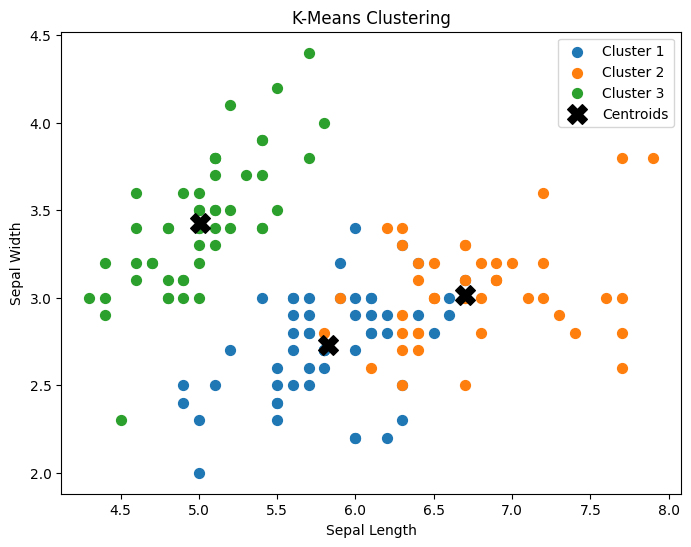

In [85]:
plot_clusters(X, pred, clf.centroids)

# PCA
Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while preserving as much of the variance in the data as possible. It is widely used in exploratory data analysis and for making predictive models more interpretable and efficient.

## Key Concepts in PCA:
1. **Variance and Covariance:**

Variance measures how much a feature varies around its mean.  
Covariance measures how two features vary together. If the covariance is high, it indicates that the features are linearly related.  
PCA tries to identify the directions (principal components) along which the variance in the data is maximized.  

2. **Dimensionality Reduction:**

PCA reduces the number of variables (dimensions) in the dataset by creating new uncorrelated features, called principal components.  
These new features are linear combinations of the original features.  
The first principal component accounts for the maximum variance in the data, the second component for the second highest variance (orthogonal to the first), and so on.  

3. **Eigenvectors and Eigenvalues:**

PCA computes the eigenvectors (directions) and eigenvalues (magnitudes) of the covariance matrix of the data.  
Eigenvectors give the directions of the new principal components, and eigenvalues indicate the magnitude or variance explained by each principal component.  

4. **Orthogonality:**

PCA ensures that the principal components are orthogonal to each other, meaning they are uncorrelated and independent.

### Steps in PCA:
1. **Standardize the Data:**  
PCA is sensitive to the scale of the features. Therefore, it is essential to standardize the dataset, especially if the features have different units or variances.  
Standardization transforms the data to have zero mean and unit variance.  

$$
x_{1} = \frac{x - \mu}{\sigma}
$$

2. **Compute the Covariance Matrix:**  
After standardizing the data, the next step is to compute the covariance matrix. This matrix shows how each feature relates to the others.  
Formula for covariance between two features X and 𝑌

$$
cov(X, Y) = \frac{1}{n - 1} \sum_{i=1}^{n}{(x_{i} - \bar{x})(y_{i} - \bar{y})}
$$

The covariance matrix is a square matrix where each element represents the covariance between two features in the dataset.

3. **Compute the Eigenvalues and Eigenvectors:**  
Once the covariance matrix is computed, we find its eigenvectors and eigenvalues.  
Eigenvectors represent the directions of maximum variance (principal components), and the eigenvalues represent the magnitude of variance along those directions.
Mathematically, for a covariance matrix C, we solve:

$$
C.v = \lambda . v
$$

where:

𝜆 is the eigenvalue,  
v is the eigenvector.    
<br />
Eigenvectors with larger eigenvalues correspond to directions with more variance.

4. **Sort the Eigenvalues and Select Principal Components:**  
After calculating the eigenvectors and eigenvalues, sort the eigenvalues in descending order. The top 
k eigenvectors corresponding to the largest eigenvalues are the principal components.  
Typically, you select the number of components based on the amount of variance you wish to preserve (e.g., 95%).


5. **Project the Data:**  
Once the top 𝑘 eigenvectors are selected, the data is projected onto these eigenvectors to obtain the principal components.  
This results in a new dataset with reduced dimensions.  
Formula

$$
X^{`} = X . V_{k}
$$

where:

X is the standardized data matrix,  
𝑉𝑘 is the matrix of the top k eigenvectors.  

6. **Interpret the Results:**  
The resulting components are linear combinations of the original features.  
The new components are uncorrelated, which helps in reducing multicollinearity in the dataset.  
Visualize the first few principal components (e.g., using a scatter plot) to understand the patterns in the reduced data.  




### Why Use PCA?
**Dimensionality Reduction:**

- PCA reduces the number of features, which can be especially helpful when you have high-dimensional data (e.g., images, text data).
- This reduction helps to prevent overfitting and can speed up the training of machine learning models.

**Noise Reduction:**  

- By keeping only the principal components with the largest eigenvalues, PCA can help reduce the noise in the data.

**Data Visualization:** 

- PCA is commonly used for visualizing high-dimensional data in 2D or 3D. For example, if you have 10 features, you can reduce it to 2 or 3 components for easy visualization.

**Feature Extraction:**  

- PCA can reveal hidden structures and relationships in the data that may not be immediately apparent.

### Limitations of PCA:
1. Linear Assumption:

>PCA assumes linear relationships between features, meaning it cannot capture nonlinear patterns in the data.

2. Sensitivity to Outliers:

>PCA can be sensitive to outliers because it tries to maximize variance, and extreme values can distort this.

In [9]:
copy_df = df.copy()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(copy_df[feature_names], copy_df['species'], test_size=0.3, random_state=42)

In [14]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [15]:
print("\nPCA Explained Variance Ratio:", pca.explained_variance_ratio_)


PCA Explained Variance Ratio: [0.9191876  0.05549301]


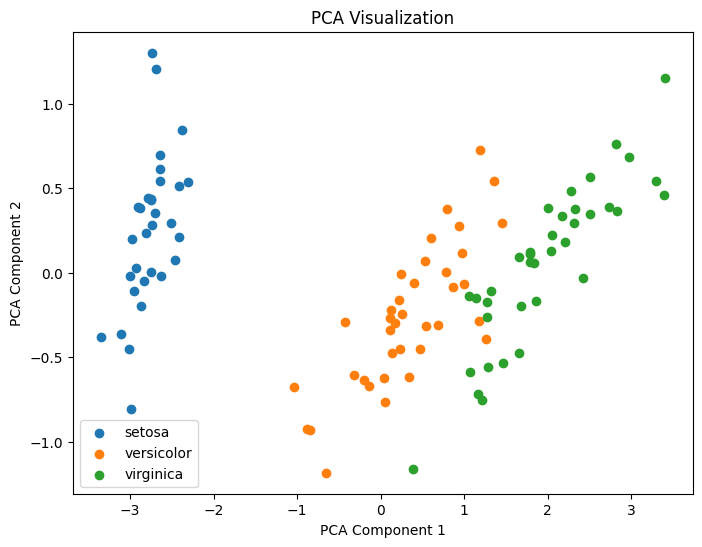

In [17]:
# Visualize PCA result
plt.figure(figsize=(8, 6))
for species in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == species, 0], X_train_pca[y_train == species, 1], label=class_names[species])
plt.title("PCA Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

# LDA
Linear Discriminant Analysis (LDA) is another technique used for dimensionality reduction, but it differs from PCA in that it is supervised, meaning that it takes into account the class labels in the data. While PCA focuses on maximizing the variance in the data, LDA aims to find the components that maximize the separation (discriminability) between different classes.

LDA works by finding a projection that minimizes the variance within each class and maximizes the variance between different classes.



### Key Concepts of LDA:
- Supervised: Unlike PCA, which is unsupervised, LDA takes the class labels into account.
- Objective: It finds the linear combinations of features that best separate the classes.
- Class Separability: LDA tries to find a lower-dimensional space where the class distributions are as distinct as possible.

### Steps in LDA:
1. Compute the Mean Vectors:  

- For each class, compute the mean of each feature.

2. Compute the Scatter Matrices:

- Within-Class Scatter Matrix (S_W): Measures the spread (variance) of the data within each class. In other words, it looks at how much the individual data points of each class deviate from their respective class mean.
- Between-Class Scatter Matrix (S_B): Measures the spread of the class means with respect to the overall mean. In other words, it quantifies how much the different class means deviate from the overall mean of the entire dataset.

3. Compute Eigenvectors and Eigenvalues:

- LDA computes the eigenvectors and eigenvalues for the matrix $ S_{W}^{-1}.S_{B} $
- These eigenvectors give the directions that maximize the separation between classes, and the eigenvalues represent how much variance is explained along each eigenvector.

4. Project the Data:

- The data is projected onto the eigenvectors corresponding to the largest eigenvalues (similar to how PCA works, but with class separability as the goal).


### How LDA Differs from PCA:
- PCA is focused on maximizing variance, whereas LDA is focused on maximizing class separability.
- PCA is unsupervised (doesn't use class labels), while LDA is supervised (uses class labels).


In [18]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [19]:
print("\nLDA Explained Variance Ratio:", lda.explained_variance_ratio_)


LDA Explained Variance Ratio: [0.98883569 0.01116431]


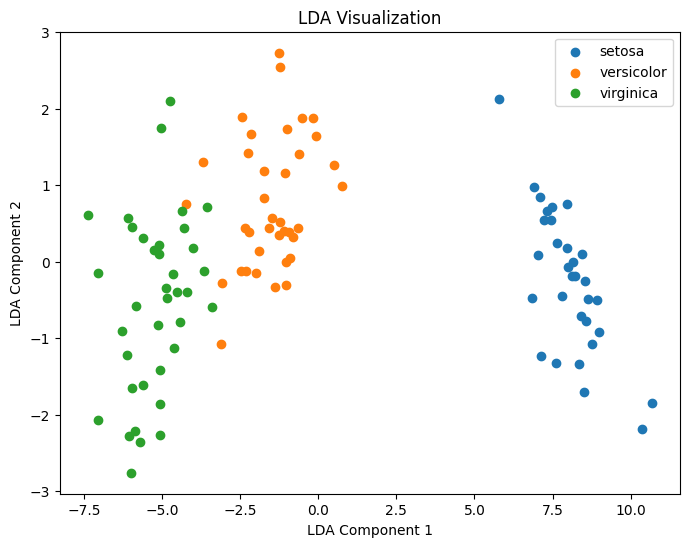

In [20]:
# Visualize LDA result
plt.figure(figsize=(8, 6))
for species in np.unique(y_train):
    plt.scatter(X_train_lda[y_train == species, 0], X_train_lda[y_train == species, 1], label=class_names[species])
plt.title("LDA Visualization")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend()
plt.show()